In [3]:
#Import Lbraries

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
from ipykernel import kernelapp as app
import pickle

In [4]:
#Step 2:- Loading the data, define the path to our data,define a function called get_data() that makes it easier for us to create our train and validation dataset. 
# I define the four labels 'dessert', 'Drinks','Meat', 'Chicken'. 
# Opencv imread function to read the images in the RGB format and resize the images to our desired width and height in this case both being 224.

labels = ['dessert', 'Drinks','Meat', 'Chicken']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
# Now we can easily fetch our train and validation data.
train = get_data(r'C:\Users\User\Desktop\CLEAN_FINAL_PROJECT\images\Train')
val = get_data(r'C:\Users\User\Desktop\CLEAN_FINAL_PROJECT\images\Test')

<ipython-input-4-0d3069b36411>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

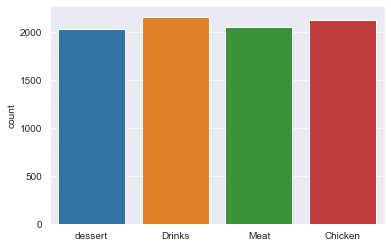

In [6]:
#Visualize the data 
# seaborn to plot the number of images in all the classes and you can see what the output looks like.

l = []
for i in train:
    if(i[1] == 0):
        l.append("dessert")
    elif(i[1] == 1):
        l.append("Drinks")
    elif(i[1] == 2):
        l.append("Meat")
    else:
        l.append("Chicken")
sns.set_style('darkgrid')
sns.countplot(l)

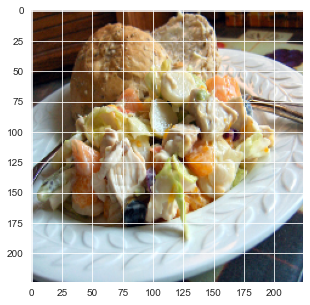

In [23]:
#visualize a random image from the classes:

plt.figure(figsize = (5,5))
plt.imshow(train[7500][0])
# plt.title(labels[train[3][1]])

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1200][0])
plt.title(labels[train[-500][1]])

In [6]:
# Data Preprocessing and Data Augmentation

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [7]:
# Import the model
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")


In [8]:
# freeze our base before we compile and train the model. Freezing will prevent the weights in our base model from being updated during training.
base_model.trainable = False

In [9]:
#Define our model using our base_model followed by a GlobalAveragePooling function to convert the features into a single vector per image.
# Add a dropout of 0.2 and the final dense layer with 4 neurons and softmax activation.

model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(4, activation="softmax")                                 
                                  ])

In [10]:
compile the model and start training it
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [12]:

history = model.fit(x_train,y_train, epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100


C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


262/262 [==============================] - 296s 1s/step - loss: 1.4814 - accuracy: 0.3476 - val_loss: 1.4574 - val_accuracy: 0.3156
Epoch 2/100
262/262 [==============================] - 261s 997ms/step - loss: 1.4523 - accuracy: 0.3576 - val_loss: 1.4352 - val_accuracy: 0.3346
Epoch 3/100
262/262 [==============================] - 262s 999ms/step - loss: 1.4212 - accuracy: 0.3661 - val_loss: 1.4153 - val_accuracy: 0.3498
Epoch 4/100
262/262 [==============================] - 258s 986ms/step - loss: 1.4034 - accuracy: 0.3760 - val_loss: 1.3970 - val_accuracy: 0.3612
Epoch 5/100
262/262 [==============================] - 259s 990ms/step - loss: 1.3928 - accuracy: 0.3786 - val_loss: 1.3801 - val_accuracy: 0.3631
Epoch 6/100
262/262 [==============================] - 258s 986ms/step - loss: 1.3660 - accuracy: 0.3887 - val_loss: 1.3644 - val_accuracy: 0.3726
Epoch 7/100
262/262 [==============================] - 259s 989ms/step - loss: 1.3473 - accuracy: 0.4045 - val_loss: 1.3498 - val_acc

In [13]:
#Save the model
import os.path
if os.path.isfile(r'C:\Users\User\Desktop\CLEAN_FINAL_PROJECT\my_model_final') is False:
    model.save(r'C:\Users\User\Desktop\CLEAN_FINAL_PROJECT\my_model_final')

INFO:tensorflow:Assets written to: C:\Users\User\Desktop\my_model_final\assets


INFO:tensorflow:Assets written to: C:\Users\User\Desktop\my_model_final\assets
C:\Users\User\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\User\anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [14]:
import os.path
if os.path.isfile(r'C:\Users\User\Desktop\CLEAN_FINAL_PROJECT\models\final_model.h5') is False:
    model.save(r'C:\Users\User\Desktop\\CLEAN_FINAL_PROJECT\models\final_model.h5')

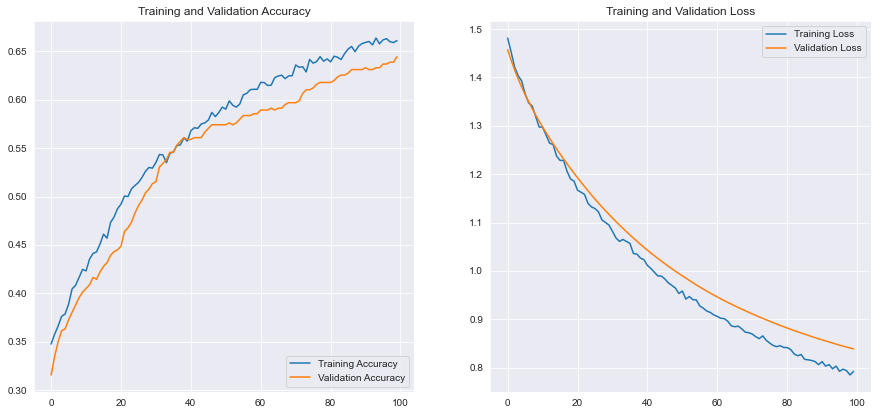

In [16]:
#Evaluating the result

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
#classification report to get more detailed results
predictions =np.argmax(model.predict(x_val), axis=-1)         
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['dessert', 'Drinks','Meat', 'Chicken']))

              precision    recall  f1-score   support

     dessert       0.66      0.69      0.67       122
      Drinks       0.77      0.87      0.81       114
        Meat       0.64      0.58      0.61       165
     Chicken       0.51      0.48      0.49       125

    accuracy                           0.64       526
   macro avg       0.64      0.65      0.65       526
weighted avg       0.64      0.64      0.64       526



In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [19]:
import os.path
if os.path.isfile(r'C:\Users\User\Desktop\CLEAN_FINAL_PROJECT\my_model_final') is False:
    model.save(r'C:\Users\User\Desktop\CLEAN_FINAL_PROJECT\my_model_final')

INFO:tensorflow:Assets written to: C:\Users\User\Desktop\my_model_final\assets


INFO:tensorflow:Assets written to: C:\Users\User\Desktop\my_model_final\assets
C:\Users\User\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\User\anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [20]:
import os.path
if os.path.isfile(r'C:\Users\User\Desktop\CLEAN_FINAL_PROJECT\models\final_model.h5') is False:
    model.save(r'C:\Users\User\Desktop\CLEAN_FINAL_PROJECT\models\final_model.h5')